# Looking at the dsp file

Jita (06 Feb 2023)

In [11]:
# Set up python environment
from pygama.raw.build_raw import build_raw
from pygama.dsp import build_dsp
#from pygama.lgdo import ls
import pygama.lgdo.lh5_store as lh5 
from pygama.vis.waveform_browser import WaveformBrowser

dsp_file = "/global/cscratch1/sd/jita/LGND-Data/r010/dsp/l200-p02-r010-cal-20230126T023019Z-tier_dsp.lh5"

## Inspecting the dsp file

In [ ]:
print("List of dsp file elements:")
lh5.ls(dsp_file)

List of dsp file elements:


['ch000',
 'ch001',
 'ch004',
 'ch005',
 'ch006',
 'ch007',
 'ch008',
 'ch009',
 'ch010',
 'ch012',
 'ch013',
 'ch018',
 'ch019',
 'ch020',
 'ch021',
 'ch022',
 'ch023',
 'ch024',
 'ch025',
 'ch030',
 'ch031',
 'ch032',
 'ch034',
 'ch035',
 'ch036',
 'ch037',
 'ch038',
 'ch039',
 'ch040',
 'ch041',
 'ch042',
 'ch043',
 'ch044',
 'ch045',
 'ch046',
 'ch049',
 'ch050',
 'ch053',
 'ch054',
 'ch055',
 'ch056',
 'ch057',
 'ch060',
 'ch061',
 'ch062',
 'ch063',
 'ch064',
 'ch065',
 'ch066',
 'ch067',
 'ch068',
 'ch069',
 'ch070',
 'ch071',
 'ch072',
 'ch073',
 'ch074',
 'ch075',
 'ch076',
 'ch081',
 'ch082',
 'ch083',
 'ch086',
 'ch087',
 'ch088',
 'ch089',
 'ch090',
 'ch091',
 'ch092',
 'ch093',
 'ch095',
 'ch096',
 'ch097',
 'ch098',
 'ch099',
 'ch100',
 'ch101',
 'ch102',
 'ch103',
 'ch104',
 'ch105',
 'ch106',
 'ch107',
 'ch109',
 'ch110',
 'ch111',
 'ch113',
 'ch114',
 'ch115',
 'ch118',
 'ch119',
 'ch121',
 'dsp_info']

In [13]:
print("Inside the channels:")
lh5.ls(dsp_file,'ch004/')

Inside the channels:


['ch004/dsp']

In [15]:
print("Inside the dsp tier:")
lh5.ls(dsp_file,'ch004/dsp/')

Inside the dsp tier:


['ch004/dsp/A_max',
 'ch004/dsp/QDrift',
 'ch004/dsp/baseline',
 'ch004/dsp/bl_intercept',
 'ch004/dsp/bl_mean',
 'ch004/dsp/bl_slope',
 'ch004/dsp/bl_std',
 'ch004/dsp/cuspEftp',
 'ch004/dsp/cuspEmax',
 'ch004/dsp/dt_eff',
 'ch004/dsp/dt_eff_invert',
 'ch004/dsp/lq80',
 'ch004/dsp/pz_mean',
 'ch004/dsp/pz_slope',
 'ch004/dsp/pz_std',
 'ch004/dsp/t_discharge',
 'ch004/dsp/t_sat_hi',
 'ch004/dsp/t_sat_lo',
 'ch004/dsp/timestamp',
 'ch004/dsp/tp_01',
 'ch004/dsp/tp_0_atrap',
 'ch004/dsp/tp_0_est',
 'ch004/dsp/tp_0_invert',
 'ch004/dsp/tp_10',
 'ch004/dsp/tp_100',
 'ch004/dsp/tp_100_invert',
 'ch004/dsp/tp_10_invert',
 'ch004/dsp/tp_20',
 'ch004/dsp/tp_20_invert',
 'ch004/dsp/tp_50',
 'ch004/dsp/tp_50_invert',
 'ch004/dsp/tp_80',
 'ch004/dsp/tp_80_invert',
 'ch004/dsp/tp_90',
 'ch004/dsp/tp_90_invert',
 'ch004/dsp/tp_95',
 'ch004/dsp/tp_99',
 'ch004/dsp/tp_99_invert',
 'ch004/dsp/tp_aoe_max',
 'ch004/dsp/tp_max',
 'ch004/dsp/tp_min',
 'ch004/dsp/trapEftp',
 'ch004/dsp/trapEmax',
 'ch004/d

In [20]:
df = lh5.load_dfs(dsp_file, ['baseline','bl_intercept','bl_mean','bl_slope','bl_std','cuspEmax','timestamp','trapEmax','zacEmax'], 'ch004/dsp')
print(df)

      baseline  bl_intercept    bl_mean  bl_slope     bl_std      cuspEmax  \
0        14989      5.851315   6.945365  0.004726  12.829613   1343.910645   
1        15006     -1.179030   4.102017  0.022812  14.463848   1812.636719   
2        15016     13.394149   9.743895 -0.015768  12.892673   2143.152832   
3        14989    -18.165699 -16.361650  0.007793  14.391339  13557.747070   
4        15143     75.680489  67.845558 -0.033844  15.437946   8289.408203   
...        ...           ...        ...       ...        ...           ...   
3538     15020    -22.823772 -16.820370  0.025933  13.622515    951.991150   
3539     14990      4.736751   6.820403  0.009001  14.554058    827.573669   
3540     15006    -14.283153 -17.115646 -0.012235  12.894878  10988.508789   
3541     15007     -0.098040   4.173441  0.018451  14.943836    857.763611   
3542     15028      5.275139   5.689616  0.001790  12.215830    812.953186   

         timestamp      trapEmax       zacEmax  
0     1.674705

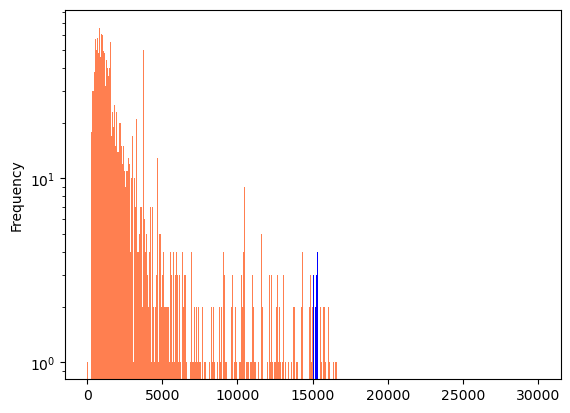

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline
trapEmax = df['trapEmax']
energy_selection = (trapEmax>15000) & (trapEmax<15500)
# making subplots
trapEmax.plot.hist(grid=False, bins=1000, range=(0, 30000),rwidth=1.,color='coral')
trapEmax[energy_selection].plot.hist(grid=False, bins=1000, range=(0, 30000),rwidth=1.,color='blue')
plt.yscale('log')